<a href="https://colab.research.google.com/github/wesal2001/wesal/blob/main/Copy_of_Diamonds_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Diamond Price Modeling**


## **1. Get The Data**

In [ ]:
#Importing the needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error

In [ ]:
#Loading the data
url = 'https://raw.githubusercontent.com/salsabeel96/diamonds/main/diamonds.csv'
diamonds = pd.read_csv(url)


# **2. Discovering The Data**

Take a Quick Look at the Data Structure

In [ ]:
# Looking out of the data
diamonds.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75



The dataset consists of almost 54,000 rows and 10 columns:

*   price: Price in dollars.
*   carat: Diamond weight. 1 carat is equal to 0.2 grams.
*   cut: Quality of diamond cut, affects its shine. Grades go from (low) Fair, Good, Very Good, Premium, Ideal (best).
*   color: Measure of diamond coloration. Increasing grades go from (some color) J, I, H, G, F, E, D (colorless).
*   clarity: Measure of diamond inclusions. Increasing grades go from (inclusions) I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF (internally flawless).
*  x, y, z: Diamond length, width, and depth, respectively, in mm.
table: Ratio of width of top face of diamond to its overall width, as a percentage.
*   depth: Proportional depth of diamond, as a percentage. This is computed as 2 * z / (x + y), or the ratio of the depth to the average of length and width.

In [ ]:
#Check if the data has a null values
diamonds.info()
#we need (3) 1hotEncoded

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
#Describe of the data
diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## **3. Data Cleaning**

In [ ]:
#know the string features
diamonds['color'].value_counts()

print("The different colors are: ", diamonds.color.unique()," ", len(diamonds.color.unique()),"Colors")
diamonds['clarity'].value_counts()

print("The different clarities are: ", diamonds.clarity.unique()," ", len(diamonds.clarity.unique()),"clarities")
diamonds['cut'].value_counts()
print("The different cuts are: ", diamonds.cut.unique()," ", len(diamonds.cut.unique()),"cuts")


The different colors are:  ['E' 'I' 'J' 'H' 'F' 'G' 'D']   7 Colors
The different clarities are:  ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']   8 clarities
The different cuts are:  ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']   5 cuts


In [ ]:
#remove the unnamed column
diamonds.drop('Unnamed: 0',axis=1,inplace=True)

check if there any zeros in dataFrame

In [ ]:
(diamonds == 0).sum(axis=0)
#there are zeros!

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           8
y           7
z          20
dtype: int64

check if there any empty in dataFrame

In [ ]:
diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

=======================

In [ ]:
#remove zeros
diamonds = diamonds.loc[(diamonds[['x','y','z']]!=0).all(axis=1)]

In [ ]:
diamonds['size']=diamonds['x']*diamonds['y']*diamonds['z']

In [ ]:
#drop x, y, z
diamonds.drop(['x','y','z'],axis=1,inplace=True)

# **4. Data Visualizations**

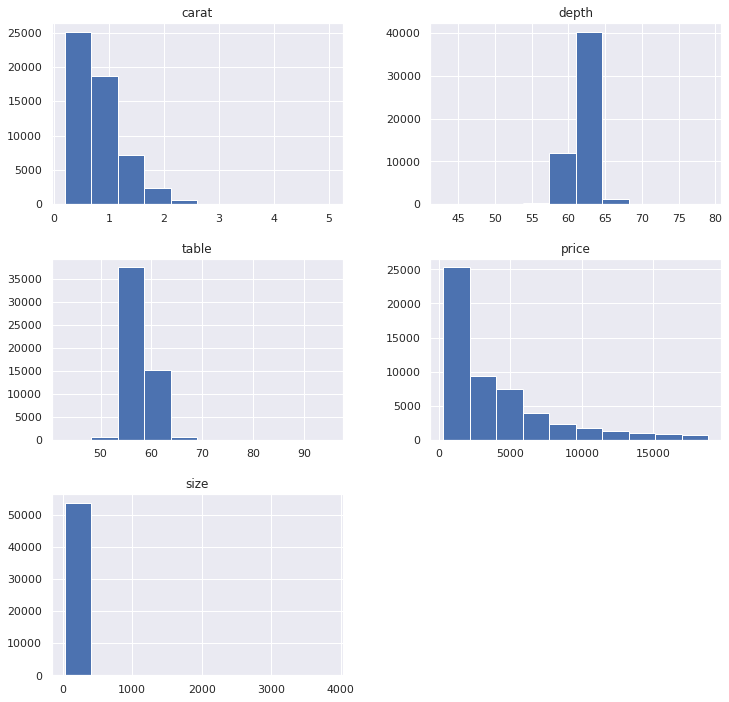

In [ ]:
#Plot hisogram for data
diamonds.hist(figsize=(12,12));

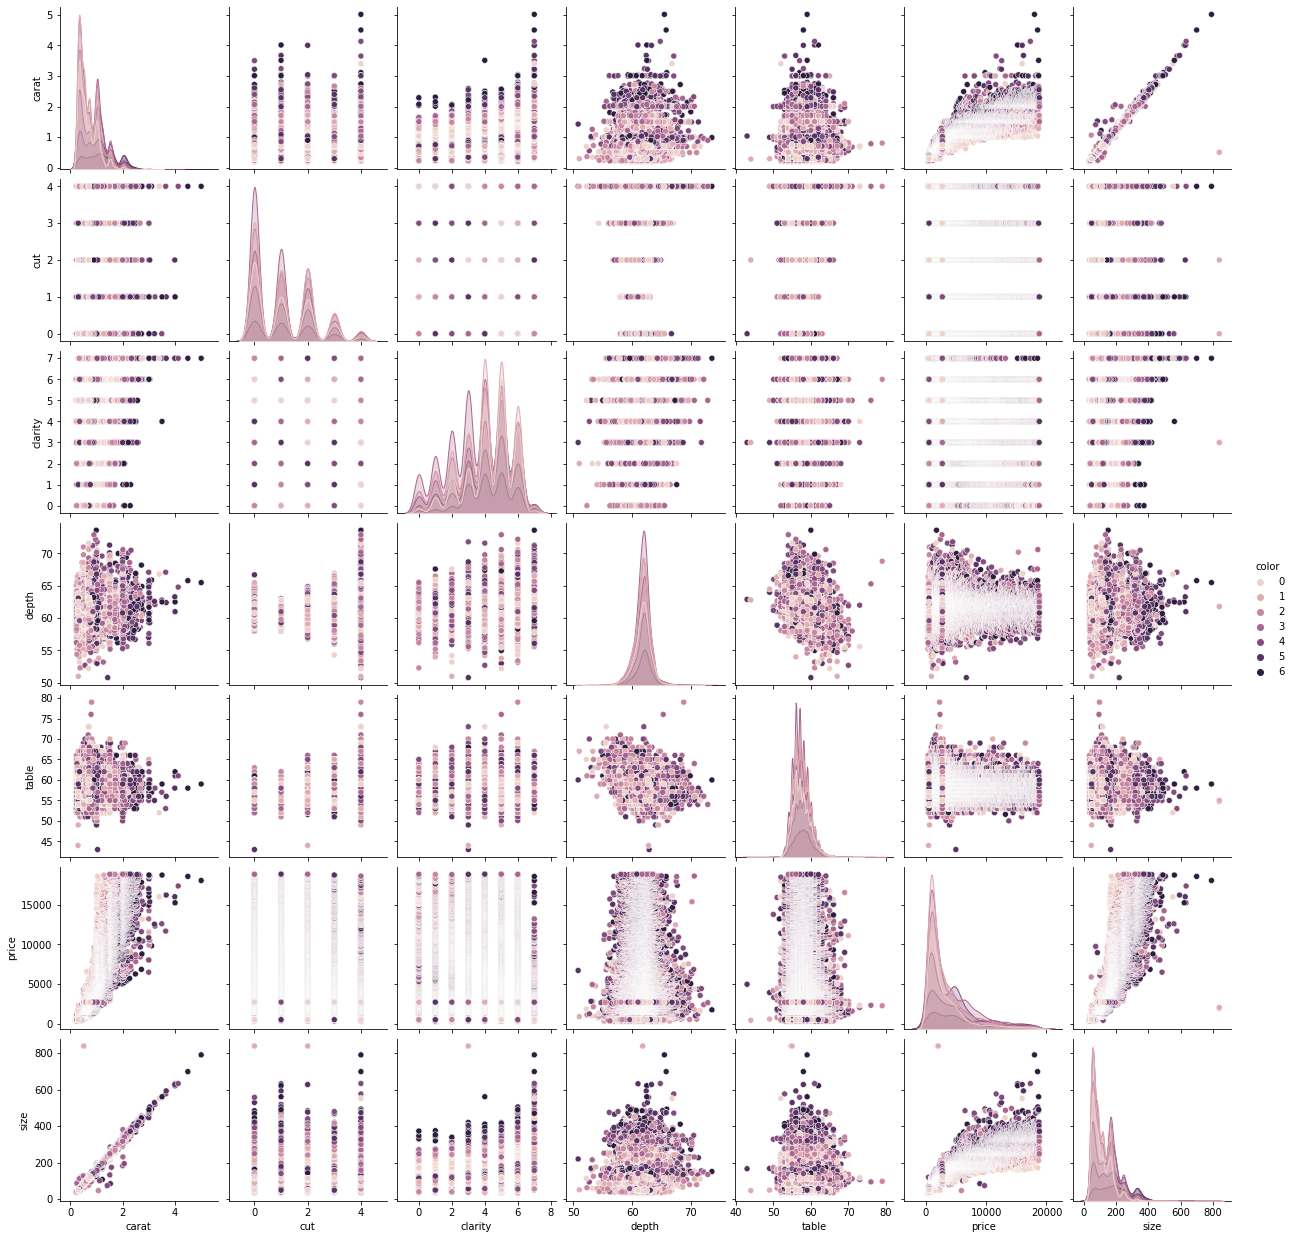

In [ ]:
sns.pairplot(diamonds , diag_kind = 'kde',hue='color');

In [ ]:
#clean some outliers
diamonds = diamonds[(diamonds["depth"]<75)&(diamonds["depth"]>45)]
diamonds = diamonds[(diamonds["table"]<80)&(diamonds["table"]>40)]
diamonds = diamonds[(diamonds['size'])<1000]

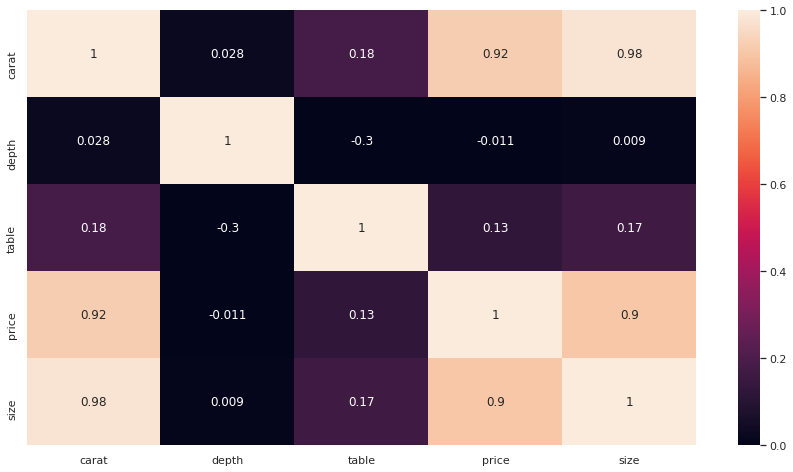

In [ ]:
# Draw The heatmap
sns.heatmap(diamonds.corr(), annot=True, vmin=0, vmax=1)  #here define the range
# strong relation between (caret,price),(size,carat)

The boxplot shows the carat and cut reltaiopship. All good, very good and ideal diamonds weigh less than 1 carat with the median <1. There are few fair and premium cut diamonds where the weight is slightly higher than 1 carat but the median is still <=1 carat. The premium cut has the highest range. Bigger diamonds mostly have fair cut. 

Text(0.5, 1.0, 'Realotionship between (carat,color) and price')

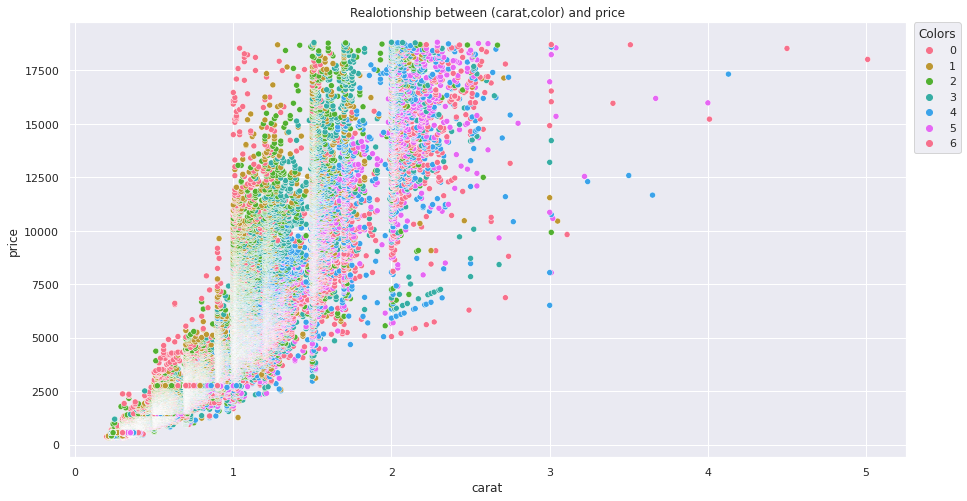

In [ ]:
#Realotionship with carat and price 
sns.scatterplot(data=diamonds, x="carat", y="price",hue="color", palette="husl")
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0,title='Colors')
plt.title('Realotionship between (carat,color) and price')

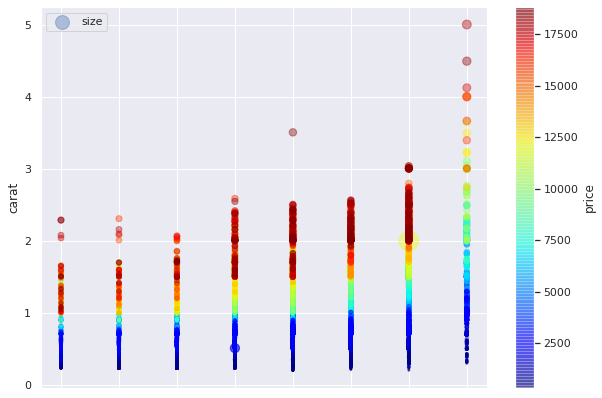

In [ ]:
diamonds.plot(kind="scatter",x='clarity',y='carat',alpha=0.4,
             s=diamonds['size']/10,label='size',figsize=(10,7),
             c='price',cmap=plt.get_cmap('jet'),colorbar=True)
plt.legend()

The scatter plot shows the strong corrlation realtionship bewtween carat and price. It is clear that the lower carat has lower price. Z dimension shows the kinds of colors. There are some outliers maybe cut for weight retention rather than beauty

Text(0.5, 1.0, 'Count of cut')

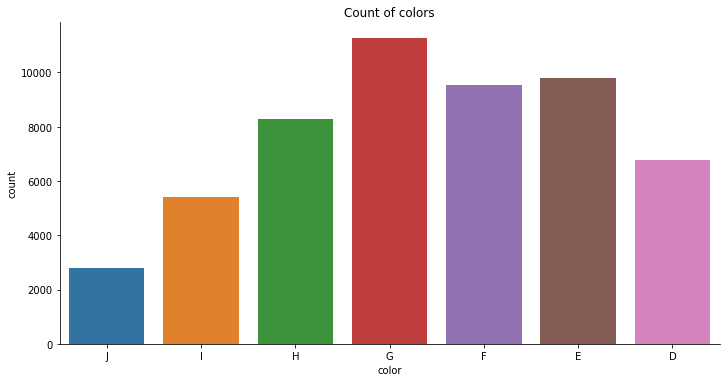

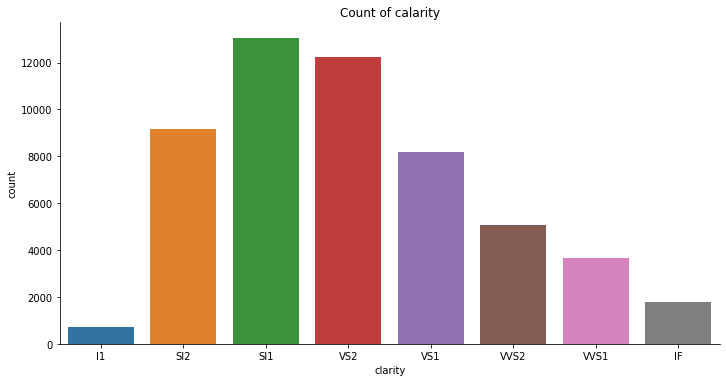

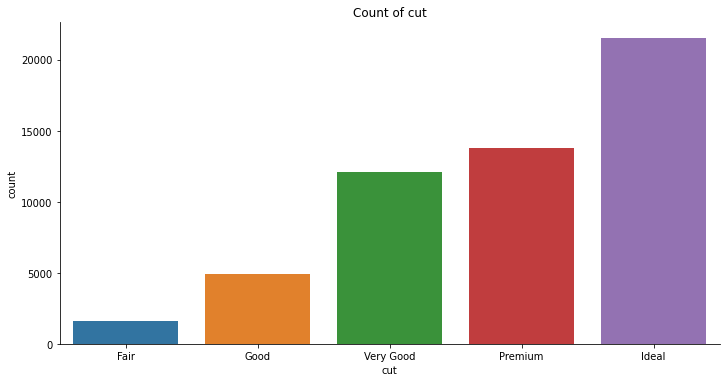

In [ ]:
#Frequnt of color
sns.catplot(x='color', data=diamonds , kind='count',aspect=2,order=['J','I','H','G','F','E','D'])
plt.title('Count of colors')
#Frequant of Calrity
sns.catplot(x='clarity', data=diamonds, kind='count',aspect=2 ,order=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'])
plt.title('Count of calarity')
#Frequant of cut
sns.catplot(x='cut', data=diamonds, kind='count',aspect=2 ,order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])
plt.title('Count of cut')

Text(0.5, 1.0, 'Boxplot graph of clarity and price')

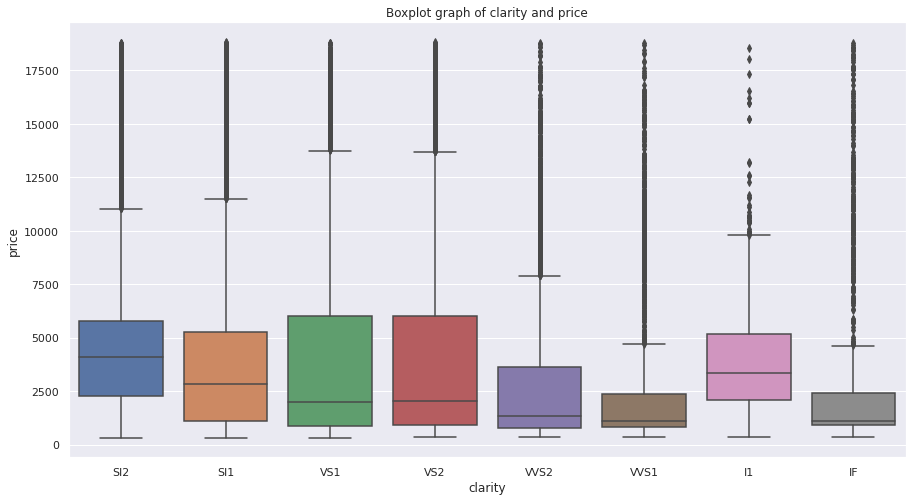

In [ ]:
sns.boxplot(x='clarity',y='price',data=diamonds)
plt.title('Boxplot graph of clarity and price')

Text(0.5, 1.0, 'Boxplot graph of color and price')

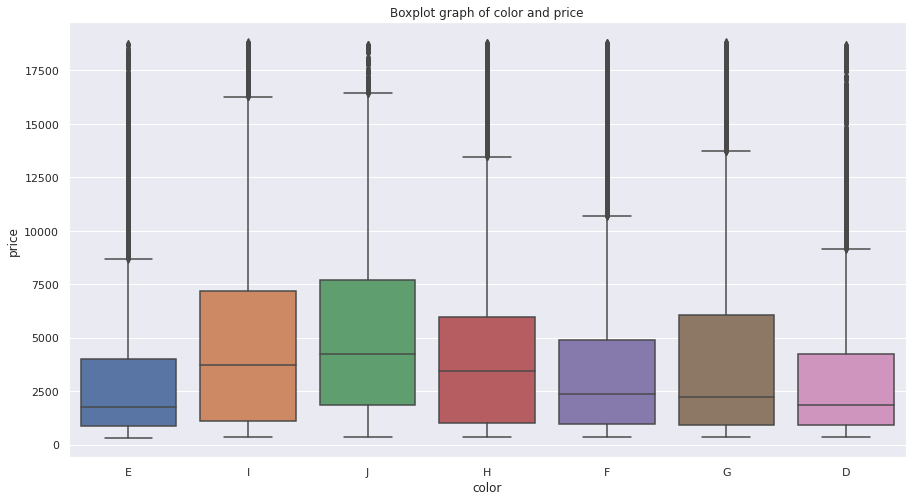

In [ ]:
sns.boxplot(x='color',y='price',data=diamonds)
plt.title('Boxplot graph of color and price')

Text(0.5, 1.0, 'Boxplot graph of cut and price')

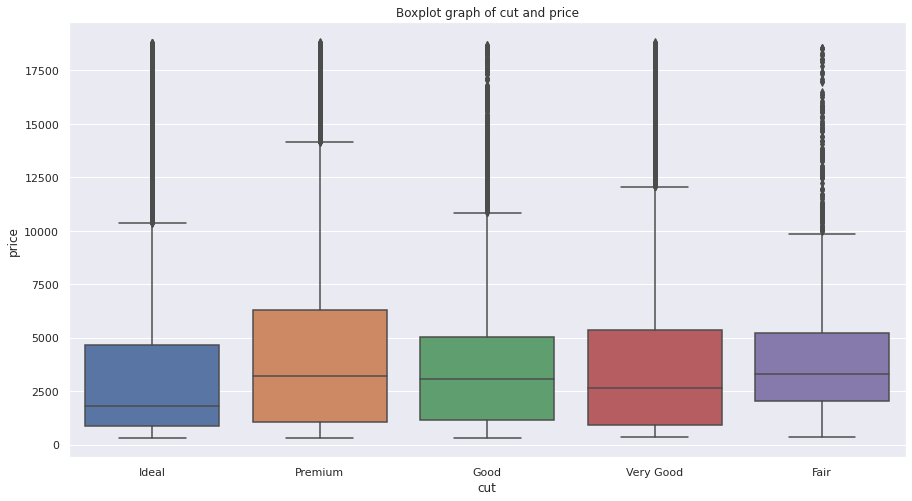

In [ ]:
sns.boxplot(x='cut',y='price',data=diamonds)
plt.title('Boxplot graph of cut and price')

## **5. Encoding**

In [ ]:
from sklearn.preprocessing import OrdinalEncoder


In [ ]:
#ordinal encoding for color column
color=['D','E','F','G','H','I','J']
clarity=['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1']
cut=['Ideal','Premium', 'Very Good', 'Good','Fair']
oe=OrdinalEncoder(categories=[cut,color,clarity])
diamonds[['cut','color','clarity']]=oe.fit_transform(diamonds[['cut','color','clarity']])

In [ ]:
#check the dataset again
diamonds.head()

,carat,cut,color,clarity,depth,table,price,size
0,0.23,4.0,1.0,6.0,61.5,55.0,326,38.202030
1,0.21,3.0,1.0,5.0,59.8,61.0,326,34.505856
2,0.23,1.0,1.0,3.0,56.9,65.0,327,38.076885
3,0.29,3.0,5.0,4.0,62.4,58.0,334,46.724580
4,0.31,1.0,6.0,6.0,63.3,58.0,335,51.917250


In [ ]:
y = diamonds["price"]
X= diamonds.drop(columns=["price","size"],axis=1)# size and carat are very correlated with each others so we need to remove one of them

In [ ]:
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)


In [ ]:
from sklearn.preprocessing import StandardScaler
# Perform pre-processing to scale numeric features
scale = StandardScaler()
X_train = scale.fit_transform(X_train)

# Test features are scaled using the scaler computed for the training features
X_test = scale.transform(X_test)

# **6. Modeling**

## **Linear Regression model**

In [ ]:
#Applying Linear Regression Model 

LinearRegressionModel = LinearRegression(fit_intercept=True, normalize=True,copy_X=True,n_jobs=-1)
LinearRegressionModel.fit(X_train, y_train)

#Calculating Details
print('Linear Regression Train Score is : ' , LinearRegressionModel.score(X_train, y_train))
print('Linear Regression Test Score is : ' , LinearRegressionModel.score(X_test, y_test))

Linear Regression Train Score is :  0.9152243924740731
Linear Regression Test Score is :  0.9175864244598456


In [ ]:
#Calculating Prediction
y_pred = LinearRegressionModel.predict(X_test)
print('Predicted Value for Linear Regression is : ' , y_pred[:10])


Predicted Value for Linear Regression is :  [ -336.3515341  2255.1484659  2719.6484659 -1138.1015341 -2124.1015341
 10480.6484659  1255.8984659  1814.8984659  5627.8984659   403.1484659]


In [ ]:
#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is : ', MSEValue)

Mean Squared Error Value is :  1302090.7443134347


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

## **Decision Tree Model**

In [ ]:

model=DecisionTreeRegressor()
model.fit(X_train,y_train)
y_predicted=model.predict(X_test)


In [ ]:
print('Decision Tree Train Score is : ' , model.score(X_train, y_train))
print('Decision Tree Test Score is : ' , model.score(X_test, y_test))

Decision Tree Train Score is :  0.9998015501387948
Decision Tree Test Score is :  0.9659017236135397


## **Linear SVR**

In [ ]:
from sklearn.svm import LinearSVR

svrReg = LinearSVR()

svrReg.fit(X_train, y_train) 

svrReg_pred = svrReg.predict(X_test)

In [ ]:
print('Decision Tree Train Score is : ' , svrReg.score(X_train, y_train))
print('Decision Tree Test Score is : ' , svrReg.score(X_test, y_test))

Decision Tree Train Score is :  0.863501963038621
Decision Tree Test Score is :  0.8687949018058536


## **Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor();
forest_reg.fit(X_train, y_train);
forReg_pred = forest_reg.predict(X_test)

In [ ]:
print('Decision Forest Train Score is : ' , forest_reg.score(X_train, y_train))
print('Decision Forest Test Score is : ' , forest_reg.score(X_test, y_test))

Decision Forest Train Score is :  0.9972108763119949
Decision Forest Test Score is :  0.9795190469346731


In [ ]:
Result= pd.DataFrame({'Actual Price':y_test,'PredPrice By LinReg':y_pred,'PredPrice By TreeModel':y_predicted,'PredPrice By LinearSVR':svrReg_pred,'PredPrice By RandomForestRegressor':forReg_pred})
Result

,Actual Price,PredPrice By LinReg,PredPrice By TreeModel,PredPrice By LinearSVR,PredPrice By RandomForestRegressor
28190,666,-336.351534,666.0,253.413543,636.781667
255,2789,2255.148466,3564.0,3078.812411,3435.960000
47495,1865,2719.648466,1883.0,2124.617370,1901.016667
397,554,-1138.101534,573.0,-235.653151,568.540000
34554,870,-2124.101534,770.0,-652.760583,1113.892500
...,...,...,...,...,...
3689,3447,4077.648466,3595.0,3901.097416,3566.402500
21782,9850,12925.398466,9850.0,11174.453909,11521.630000
25521,14330,13328.148466,12683.0,11398.433532,13346.926667
48121,1938,2440.148466,2170.0,2104.141770,1967.399286


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = [ {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(X_train,y_train )

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([8.72870885e-01, 1.55106637e-02, 1.49140424e-02, 4.08605360e-03,
       4.51341039e-03, 2.97564415e-03, 2.84092010e-03, 3.95573396e-03,
       7.46155888e-03, 7.97660013e-03, 9.78632084e-03, 4.80575414e-03,
       7.90486528e-03, 1.25491636e-02, 3.83772751e-03, 4.12083243e-03,
       5.38361498e-03, 6.46556766e-03, 1.08677928e-03, 8.44977936e-04,
       2.66145402e-03, 2.41711700e-03, 1.03031341e-03])

In [ ]:
# CODE HERE
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

588.8771187664593

In [ ]:
print('Random Forest after grid Train Score is : ' , final_model.score(X_train, y_train))
print('Random Forest after grid Test Score is : ' , final_model.score(X_test, y_test))

Random Forest after grid Train Score is :  0.9965081502738629
Random Forest after grid Test Score is :  0.9780513979484003


 **The Random Forest Model gives us the cloesest value to actual price**